In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

def create_model(hidden_layers, neurons):
  model = Sequential()
  model.add(Dense(neurons, activation='relu', input_shape=(28*28,)))
  for _ in range(hidden_layers-1):
    model.add(Dense(neurons, activation='relu'))
  model.add(Dense(10, activation='softmax'))  
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model




In [3]:
# Experiment with different configurations
hidden_layers_list = [1, 2, 3]  # Experiment with different numbers of hidden layers
neurons_list = [32, 64, 128]     # Experiment with different numbers of neurons

for hidden_layers in hidden_layers_list:
  for neurons in neurons_list:
    model = create_model(hidden_layers, neurons)
    model.fit(x_train, y_train, epochs=5)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Configuration: Hidden Layers - {hidden_layers}, Neurons - {neurons}')
    print(f'Test Accuracy: {test_acc:.4f}')


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3623 - accuracy: 0.8981
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1965 - accuracy: 0.9427
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1580 - accuracy: 0.9542
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1350 - accuracy: 0.9607
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1389 - accuracy: 0.9592
Configuration: Hidden Layers - 1, Neurons - 32
Test Accuracy: 0.9592
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2983 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1444 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1041 - accuracy: 0.9692
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0824 - accuracy: 0.9751
Epoch 5/5
313/313 [=====

Configuration: Hidden Layers - 1, Neurons - 32
Test Accuracy: 0.9658
Configuration: Hidden Layers - 1, Neurons - 64
Test Accuracy: 0.9728
Configuration: Hidden Layers - 1, Neurons - 128
Test Accuracy: 0.9771
Configuration: Hidden Layers - 2, Neurons - 32
Test Accuracy: 0.9609
Configuration: Hidden Layers - 2, Neurons - 64
Test Accuracy: 0.9728
Configuration: Hidden Layers - 2, Neurons - 128
Test Accuracy: 0.9774
Configuration: Hidden Layers - 3, Neurons - 32
Test Accuracy: 0.9645
Configuration: Hidden Layers - 3, Neurons - 64
Test Accuracy: 0.9719
Configuration: Hidden Layers - 3, Neurons - 128
Test Accuracy: 0.9795


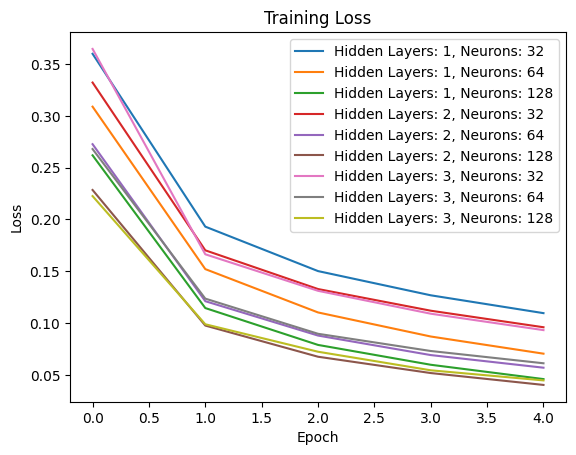

Configuration: Hidden Layers - 1, Neurons - 32
Test Accuracy: 0.9602
Configuration: Hidden Layers - 1, Neurons - 64
Test Accuracy: 0.9704
Configuration: Hidden Layers - 1, Neurons - 128
Test Accuracy: 0.9771
Configuration: Hidden Layers - 2, Neurons - 32
Test Accuracy: 0.9627
Configuration: Hidden Layers - 2, Neurons - 64
Test Accuracy: 0.9752
Configuration: Hidden Layers - 2, Neurons - 128
Test Accuracy: 0.9743
Configuration: Hidden Layers - 3, Neurons - 32
Test Accuracy: 0.9615
Configuration: Hidden Layers - 3, Neurons - 64
Test Accuracy: 0.9694
Configuration: Hidden Layers - 3, Neurons - 128
Test Accuracy: 0.9775


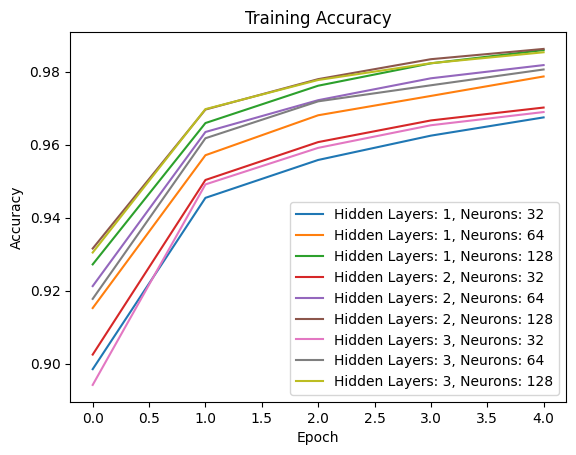

In [4]:
import matplotlib.pyplot as plt

# Experiment with different configurations
hidden_layers_list = [1, 2, 3]  # Experiment with different numbers of hidden layers
neurons_list = [32, 64, 128]     # Experiment with different numbers of neurons

for hidden_layers in hidden_layers_list:
    for neurons in neurons_list:
        model = create_model(hidden_layers, neurons)
        history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
        
        # Plot loss
        plt.plot(history.history['loss'], label=f'Hidden Layers: {hidden_layers}, Neurons: {neurons}')
        
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'Configuration: Hidden Layers - {hidden_layers}, Neurons - {neurons}')
        print(f'Test Accuracy: {test_acc:.4f}')

# Plot loss
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure()

for hidden_layers in hidden_layers_list:
    for neurons in neurons_list:
        model = create_model(hidden_layers, neurons)
        history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
        
        # Plot accuracy
        plt.plot(history.history['accuracy'], label=f'Hidden Layers: {hidden_layers}, Neurons: {neurons}')
        
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'Configuration: Hidden Layers - {hidden_layers}, Neurons - {neurons}')
        print(f'Test Accuracy: {test_acc:.4f}')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
